In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import suncalc

import dask.dataframe as dd
from pathlib import Path
import glob
import re

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")
sys.path.append("../src/bout")
sys.path.append("../src/tests")

In [3]:
import bout.clustering as clstr
import bout.assembly as bt
import bout.plot as bt_plt
import test_activity_metric_functions as test_actvt
import activity.subsampling as ss
import activity.activity_assembly as actvt
import pipeline
from core import SITE_NAMES, FREQUENCY_COLOR_MAPPINGS

from cli import get_file_paths
import pipeline

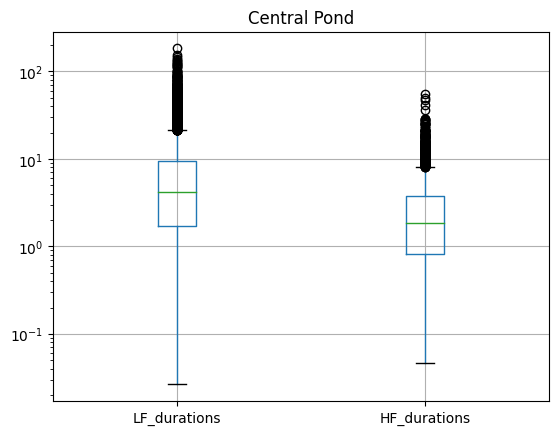

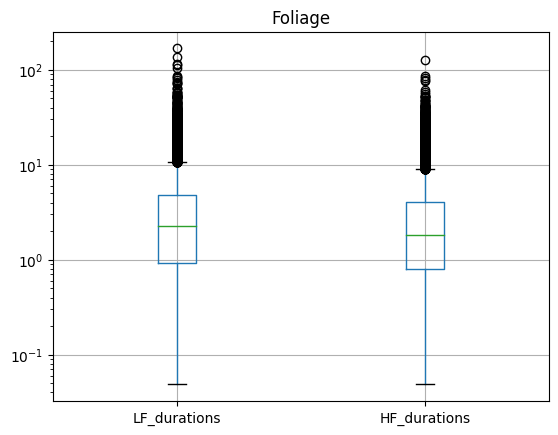

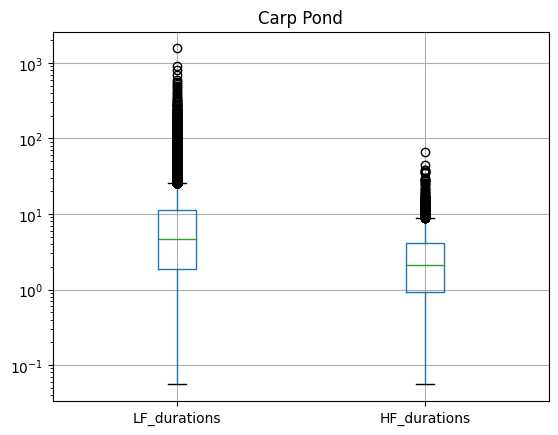

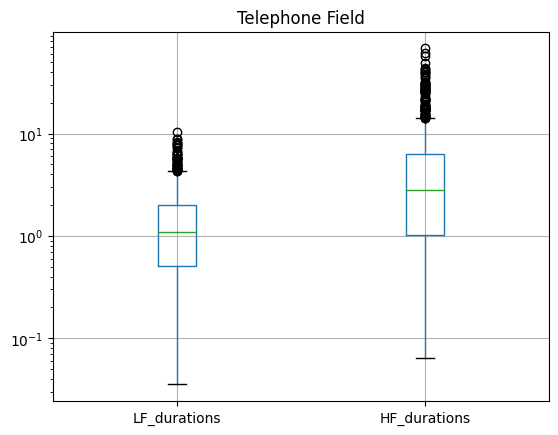

In [4]:
for site_key in list(SITE_NAMES.keys()):

    data_params = dict()
    data_params['site_tag'] = site_key
    data_params['recording_start'] = '00:00'
    data_params['recording_end'] = '16:00'
    data_params['cur_dc_tag'] = '6of6'
    data_params['cycle_length'] = int(data_params['cur_dc_tag'].split('of')[-1])
    data_params['time_on'] = int(data_params['cur_dc_tag'].split('of')[0])
    data_params['time_on_in_secs'] = 60*data_params['time_on']

    pipeline_params = dict()
    pipeline_params['assemble_location_summary'] = True
    pipeline_params["read_csv"] = False
    pipeline_params['use_threshold_to_group'] = False
    pipeline_params['use_kmeans_to_group'] = True

    freq_key = 'LF'

    data_params['type_tag'] = freq_key
    file_paths = get_file_paths(data_params)

    location_df = pd.read_csv(f'{file_paths["SITE_folder"]}/{file_paths["bd2_TYPE_SITE_YEAR"]}.csv', low_memory=False, index_col=0)
    bout_params = bt.get_bout_params_from_location(location_df, data_params)
    dc_applied_df = ss.simulate_dutycycle_on_detections(location_df.copy(), data_params)
    tagged_dets = bt.classify_bouts_in_bd2_predictions_for_freqgroups(dc_applied_df, bout_params)
    bout_metrics_LF = bt.construct_bout_metrics_from_location_df_for_freqgroups(tagged_dets)

    freq_key = 'HF'

    data_params['type_tag'] = freq_key
    file_paths = get_file_paths(data_params)

    location_df = pd.read_csv(f'{file_paths["SITE_folder"]}/{file_paths["bd2_TYPE_SITE_YEAR"]}.csv', low_memory=False, index_col=0)
    bout_params = bt.get_bout_params_from_location(location_df, data_params)
    dc_applied_df = ss.simulate_dutycycle_on_detections(location_df.copy(), data_params)
    tagged_dets = bt.classify_bouts_in_bd2_predictions_for_freqgroups(dc_applied_df, bout_params)
    bout_metrics_HF = bt.construct_bout_metrics_from_location_df_for_freqgroups(tagged_dets)

    bout_durations = pd.DataFrame()
    bout_durations['LF_durations'] = bout_metrics_LF['bout_duration_in_secs']
    bout_durations['HF_durations'] = bout_metrics_HF['bout_duration_in_secs']
    bout_durations.boxplot(column=['LF_durations', 'HF_durations'])
    plt.title(f'{SITE_NAMES[site_key]}')
    plt.yscale('log')
    plt.show()

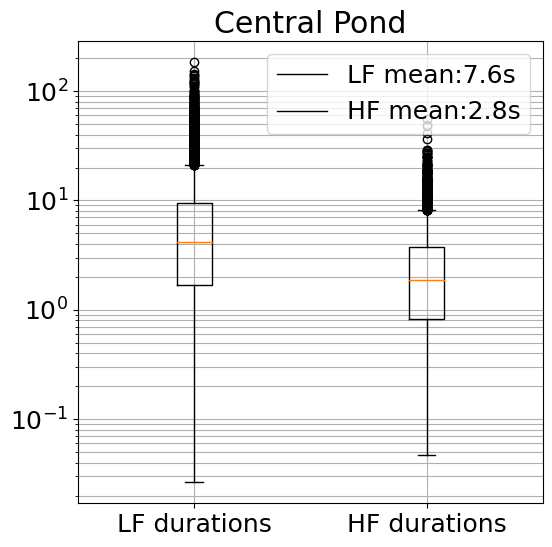

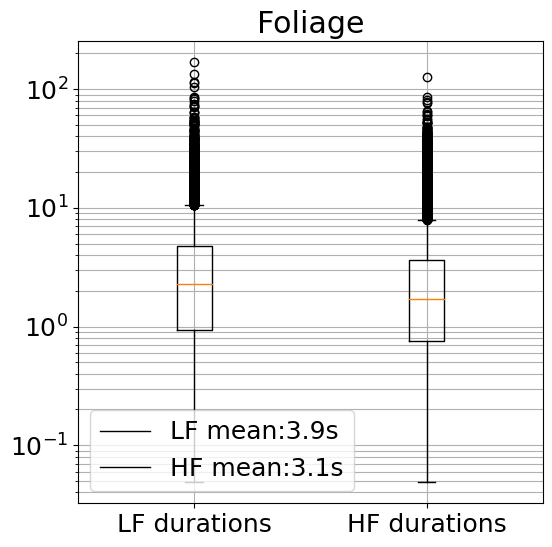

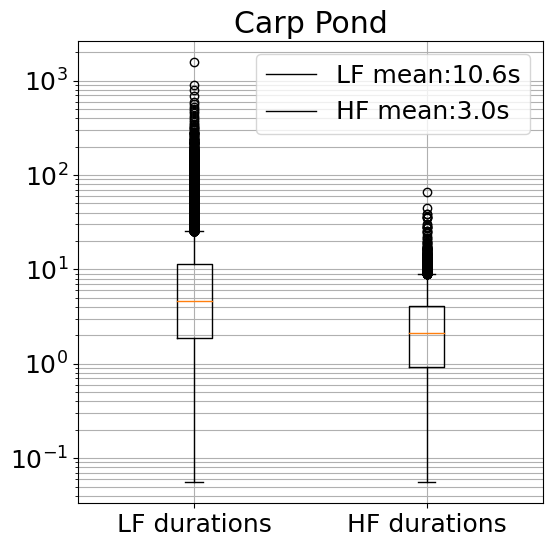

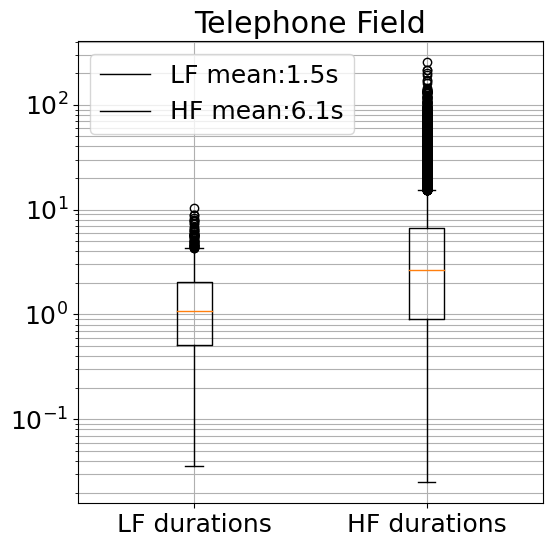

In [19]:
for site_key in list(SITE_NAMES.keys()):
    data_params = dict()
    data_params['site_tag'] = site_key
    data_params['recording_start'] = '00:00'
    data_params['recording_end'] = '16:00'
    data_params['cur_dc_tag'] = '6of6'
    data_params['cycle_length'] = int(data_params['cur_dc_tag'].split('of')[-1])
    data_params['time_on'] = int(data_params['cur_dc_tag'].split('of')[0])
    data_params['time_on_in_secs'] = 60*data_params['time_on']

    pipeline_params = dict()
    pipeline_params['assemble_location_summary'] = True
    pipeline_params["read_csv"] = False
    pipeline_params['use_threshold_to_group'] = False
    pipeline_params['use_kmeans_to_group'] = True

    freq_key = 'LF'

    data_params['type_tag'] = freq_key
    file_paths = get_file_paths(data_params)

    location_df = pd.read_csv(f'{file_paths["SITE_folder"]}/{file_paths["bd2_TYPE_SITE_YEAR"]}.csv', low_memory=False, index_col=0)
    bout_params = bt.get_bout_params_from_location(location_df, data_params)
    dc_applied_df = ss.simulate_dutycycle_on_detections(location_df.copy(), data_params)
    tagged_dets = bt.classify_bouts_in_bd2_predictions_for_freqgroups(dc_applied_df, bout_params)
    bout_metrics_LF = bt.construct_bout_metrics_from_location_df_for_freqgroups(tagged_dets)

    freq_key = 'HF'

    data_params['type_tag'] = freq_key
    file_paths = get_file_paths(data_params)

    location_df = pd.read_csv(f'{file_paths["SITE_folder"]}/{file_paths["bd2_TYPE_SITE_YEAR"]}.csv', low_memory=False, index_col=0)
    bout_params = bt.get_bout_params_from_location(location_df, data_params)
    dc_applied_df = ss.simulate_dutycycle_on_detections(location_df.copy(), data_params)
    tagged_dets = bt.classify_bouts_in_bd2_predictions_for_freqgroups(dc_applied_df, bout_params)
    bout_metrics_HF = bt.construct_bout_metrics_from_location_df_for_freqgroups(tagged_dets)

    plt.figure(figsize=(6, 6))
    plt.rcParams.update({'font.size':18})
    plt.title(f'{SITE_NAMES[site_key]}')
    plt.boxplot([bout_metrics_LF['bout_duration_in_secs'], bout_metrics_HF['bout_duration_in_secs']])
    plt.xticks([1, 2], ['LF durations', 'HF durations'])
    plt.yscale('log')
    plt.legend([f'LF mean:{round(bout_metrics_LF["bout_duration_in_secs"].mean(), 1)}s', f'HF mean:{round(bout_metrics_HF["bout_duration_in_secs"].mean(), 1)}s'])
    plt.grid(which='both')
    plt.show()